# Descriptive Statistics Channels

In [1]:
import os
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/var/folders/mx/qyzv6w1s6vvfbglqfp09p6240000gq/T/ipykernel_84448/3360548993.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# folder_path = 'dataset/output_channel_dataset'
# csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv.gz')]
# df_list = []
# for file in csv_files:
#     df = pd.read_csv(file, compression='gzip')
#     df_list.append(df)
# merged_df = pd.concat(df_list, ignore_index=True)
# output_file = 'dataset/output_channel_dataset/merged_output.csv.gz'
# merged_df.to_csv(output_file, index=False, compression='gzip')
# print(f"Merged file saved as {output_file}")


In [3]:
dataset_path = os.path.abspath(os.path.join(os.getcwd(), 'dataset', 'output_channel_dataset', 'merged_channels_dataset.csv.gz'))
channels_dataset_df = pd.read_csv(dataset_path, compression='gzip')
channels_dataset_df.dtypes

/var/folders/mx/qyzv6w1s6vvfbglqfp09p6240000gq/T/ipykernel_84448/2735871774.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  channels_dataset_df = pd.read_csv(dataset_path, compression='gzip')


channel_id                   object
channel_name                 object
channel_description          object
channel_links                object
channel_video_count         float64
channel_view_count          float64
channel_subscriber_count     object
channel_country              object
channel_creation_date        object
date_of_capture              object
is_active                    object
dtype: object

In [4]:
index_position = 3
record = channels_dataset_df.iloc[index_position]
print(record)

channel_id                                           UCLhvR94vq6Z4H_cnvH9gcEA
channel_name                                                 FLAVIO VITOR JR.
channel_description         O cantor e compositor católico Flávio Vitor Jr...
channel_links               ['GBA Music: gbamusic.com.br', 'GBA Music: api...
channel_video_count                                                      62.0
channel_view_count                                                 26111257.0
channel_subscriber_count                                                 133K
channel_country                                                        Brazil
channel_creation_date                                     2019-01-16 00:00:00
date_of_capture                                    2024-09-16 05:06:31.189195
is_active                                                                True
Name: 3, dtype: object


## How many of the records with active status & inactive status

In [5]:
active_channels_df = channels_dataset_df[channels_dataset_df['is_active'] == True]
active_count = int(active_channels_df["channel_id"].count())
active_count

971756

In [6]:
inactive_channels_df = channels_dataset_df[channels_dataset_df['is_active'] == False]
inactive_count = int(inactive_channels_df["channel_id"].count())
inactive_count

28242

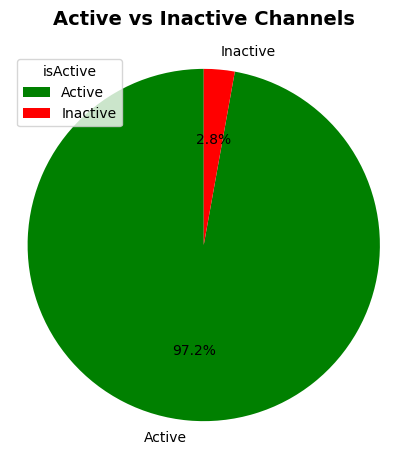

In [7]:
labels = ['Active', 'Inactive']
sizes = [active_count, inactive_count]
colors = ['green','red']
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Active vs Inactive Channels', fontsize=14, fontweight='bold', pad=20)
plt.legend(title="isActive", loc="upper left")
plt.show()


## Channels by their creation date

In [8]:
def convert_subscriber_count(subscriber_count):
    if pd.isna(subscriber_count):
        return np.nan
    if 'K' in subscriber_count:
        return int(float(subscriber_count.replace('K', '')) * 1e3)
    elif 'M' in subscriber_count:
        return int(float(subscriber_count.replace('M', '')) * 1e6)
    else:
        return int(subscriber_count)

active_channels_df.loc[:, 'converted_subscriber_count'] = active_channels_df['channel_subscriber_count'].apply(convert_subscriber_count)


/var/folders/mx/qyzv6w1s6vvfbglqfp09p6240000gq/T/ipykernel_84448/1415733061.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_channels_df.loc[:, 'converted_subscriber_count'] = active_channels_df['channel_subscriber_count'].apply(convert_subscriber_count)


In [11]:
active_channels_df

,channel_id,channel_name,channel_description,channel_links,channel_video_count,channel_view_count,channel_subscriber_count,channel_country,channel_creation_date,date_of_capture,is_active,converted_subscriber_count
0,UCk0suyGJ2MzWK4RoqcVpjNA,LiberArte con el Padre Brunel DR,👉DALE LIKE a nuestros videos **Suscríbete a nu...,[],2394.0,16606994.0,98.2K,United States,2019-06-03 00:00:00,2024-09-16 05:06:29.129242,True,98200.0
1,UCEwABMGDRZSAI_fnwfjbhLw,Somos Católicos,As melhores pregações católicas para ajudá-lo ...,['Facebook: facebook.com/somoscatolicos.com.br...,62.0,2281383.0,41.1K,Brazil,2014-12-27 00:00:00,2024-09-16 05:06:29.796667,True,41100.0
2,UCPMf__hOzPYjvOI8lJk9ZXw,INFOPASION,TODA LA INFORMACION QUE NECESITAS SOBRE LA ACT...,[],1454.0,13384882.0,86.6K,Peru,2021-06-03 00:00:00,2024-09-16 05:06:30.509414,True,86600.0
3,UCLhvR94vq6Z4H_cnvH9gcEA,FLAVIO VITOR JR.,O cantor e compositor católico Flávio Vitor Jr...,"['GBA Music: gbamusic.com.br', 'GBA Music: api...",62.0,26111257.0,133K,Brazil,2019-01-16 00:00:00,2024-09-16 05:06:31.189195,True,133000.0
4,UCYog9QxIdGiXnPanTRFoL3Q,FCGRI,This is the YouTube Channel for Primera Iglesi...,[],1418.0,623037.0,2.31K,United States,2014-01-06 00:00:00,2024-09-16 05:06:31.965834,True,2310.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,UCPVCE5GzlVyfx_nIFhY26rg,gzaly ruko,"Share your videos with friends, family, and th...",[],12.0,124440.0,711,NaN,2018-04-06 00:00:00,2024-09-29 00:25:49.157956,True,711.0
999996,UCsHv-SXlJ6LjjZ4-gGmvgYg,Bassma LM Channel,مرحبا بكم في قناتي اناقة وجمال التي تهتم بكل م...,[],111.0,23187.0,247,Morocco,2021-01-10 00:00:00,2024-09-29 00:25:49.939188,True,247.0
999997,UCPog7O6m7johwcnIfnOgBzg,EverardoSchinnerMoze97 PG,"Share your videos with friends, family, and th...",[],2.0,1145325.0,2.62K,NaN,2019-12-09 00:00:00,2024-09-29 00:25:50.907536,True,2620.0
999998,UCDfIy_peeVf-LJYU3zU2R0Q,Yahya Djlali,"Share your videos with friends, family, and th...",[],7.0,2933.0,13,NaN,2020-08-28 00:00:00,2024-09-29 00:25:51.666781,True,13.0


/var/folders/mx/qyzv6w1s6vvfbglqfp09p6240000gq/T/ipykernel_84448/2583469740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_channels_df['channel_creation_date'] = pd.to_datetime(active_channels_df['channel_creation_date'])
/var/folders/mx/qyzv6w1s6vvfbglqfp09p6240000gq/T/ipykernel_84448/2583469740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_channels_df['year'] = active_channels_df['channel_creation_date'].dt.year


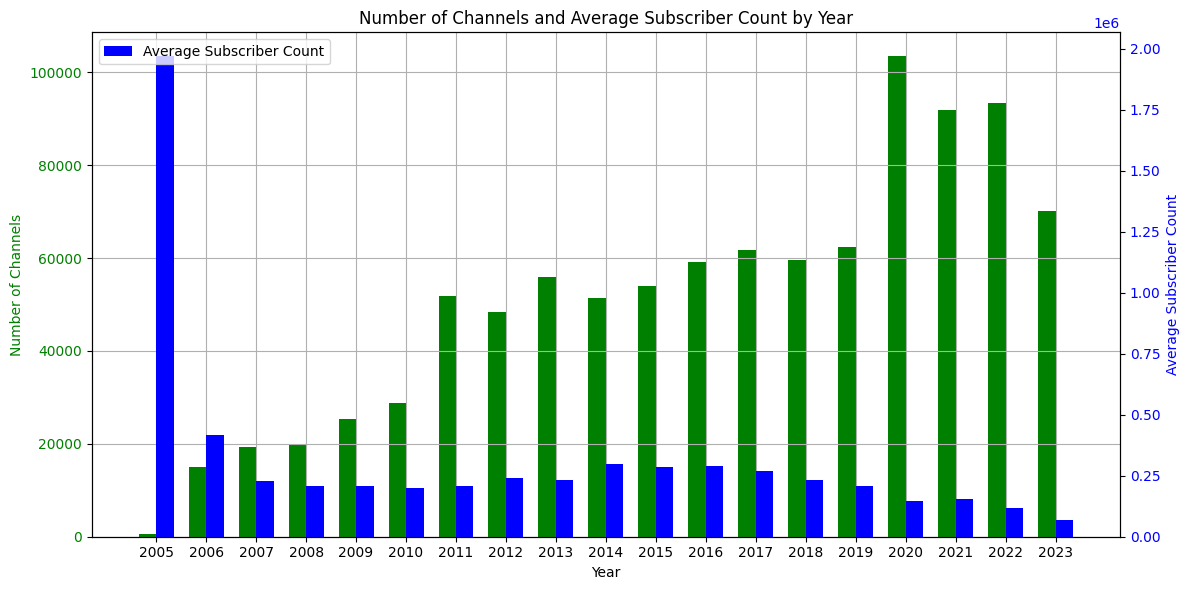

In [14]:
active_channels_df['channel_creation_date'] = pd.to_datetime(active_channels_df['channel_creation_date'])
active_channels_df['year'] = active_channels_df['channel_creation_date'].dt.year

year_counts = active_channels_df['year'].value_counts().sort_index()
avg_subscribers_per_year = active_channels_df.groupby('year')['converted_subscriber_count'].mean().sort_index()

years = year_counts.index.astype(int)
bar_width = 0.35
index = np.arange(len(years))

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(index, year_counts.values, bar_width, label='Number of Channels', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Channels', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.bar(index + bar_width, avg_subscribers_per_year.values, bar_width, label='Average Subscriber Count', color='blue')
ax2.set_ylabel('Average Subscriber Count', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.grid(True)

plt.xticks(index + bar_width / 2, years, rotation=45)

plt.title('Number of Channels and Average Subscriber Count by Year')
fig.tight_layout()
plt.legend(loc='upper left')

plt.show()


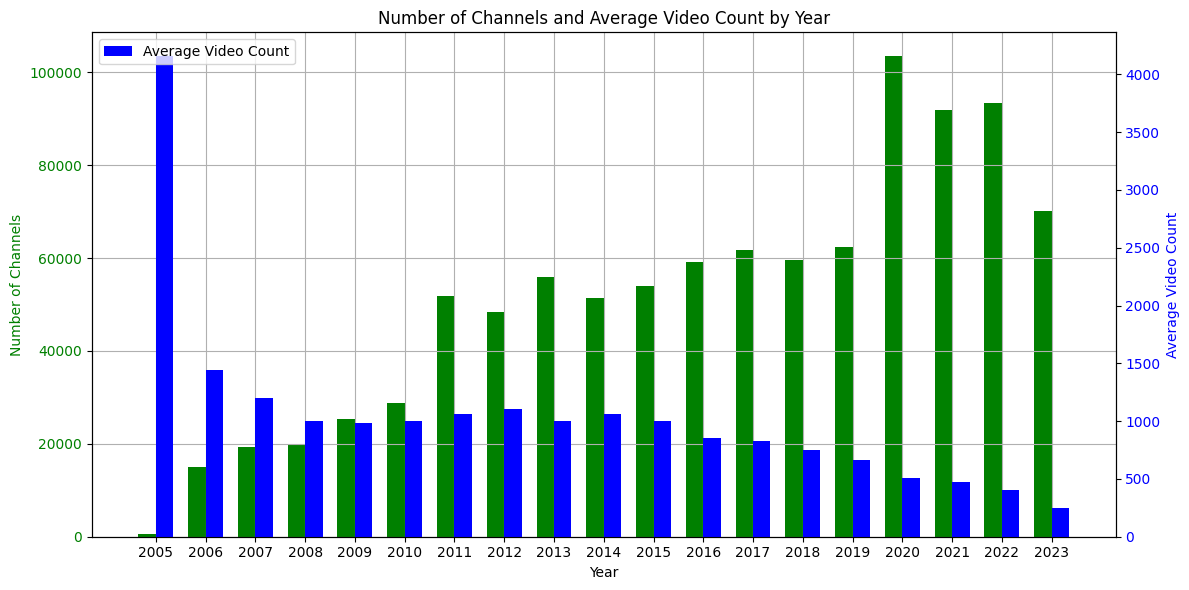

In [16]:
active_channels_df.loc[:, 'channel_creation_date'] = pd.to_datetime(active_channels_df['channel_creation_date'])
active_channels_df.loc[:, 'year'] = active_channels_df['channel_creation_date'].dt.year

year_counts = active_channels_df['year'].value_counts().sort_index()
avg_videos_per_year = active_channels_df.groupby('year')['channel_video_count'].mean().sort_index()

years = year_counts.index.astype(int)
bar_width = 0.35
index = np.arange(len(years))

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(index, year_counts.values, bar_width, label='Number of Channels', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Channels', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.bar(index + bar_width, avg_videos_per_year.values, bar_width, label='Average Video Count', color='blue')
ax2.set_ylabel('Average Video Count', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.grid(True)
plt.xticks(index + bar_width / 2, years, rotation=45)
plt.title('Number of Channels and Average Video Count by Year')
fig.tight_layout()

plt.legend(loc='upper left')

plt.show()


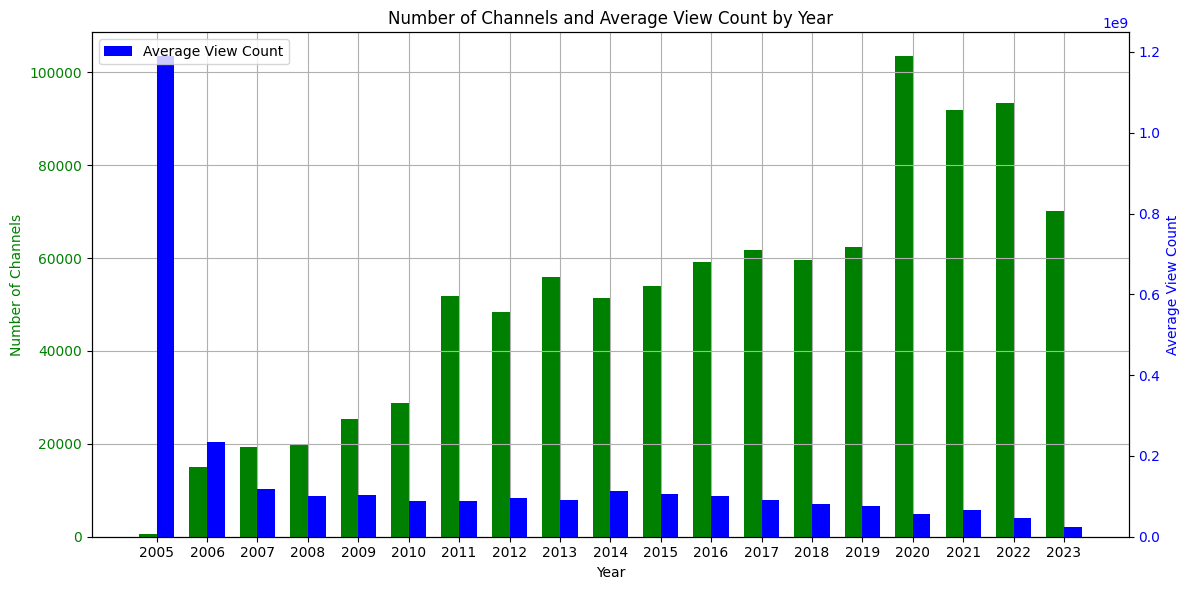

In [17]:
active_channels_df.loc[:, 'channel_creation_date'] = pd.to_datetime(active_channels_df['channel_creation_date'])
active_channels_df.loc[:, 'year'] = active_channels_df['channel_creation_date'].dt.year

year_counts = active_channels_df['year'].value_counts().sort_index()
avg_views_per_year = active_channels_df.groupby('year')['channel_view_count'].mean().sort_index()

years = year_counts.index.astype(int)
bar_width = 0.35
index = np.arange(len(years))

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(index, year_counts.values, bar_width, label='Number of Channels', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Channels', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.bar(index + bar_width, avg_views_per_year.values, bar_width, label='Average View Count', color='blue')
ax2.set_ylabel('Average View Count', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.grid(True)
plt.xticks(index + bar_width / 2, years, rotation=45)
plt.title('Number of Channels and Average View Count by Year')
fig.tight_layout()

plt.legend(loc='upper left')

plt.show()


## Channels by their countries

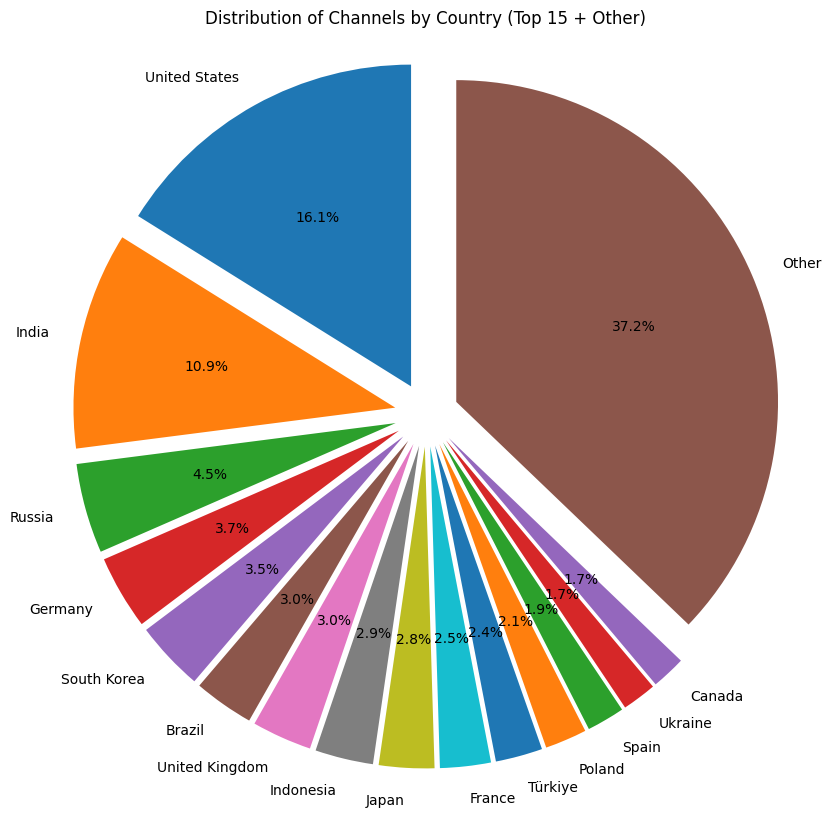

In [19]:
channel_country_counts = active_channels_df['channel_country'].value_counts()

top_countries = channel_country_counts.nlargest(15)
other_countries = channel_country_counts.iloc[15:].sum()

labels = list(top_countries.index) + ['Other']
sizes = list(top_countries.values) + [other_countries]

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=[0.1] * len(labels))

plt.title('Distribution of Channels by Country (Top 15 + Other)')
plt.axis('equal')

plt.show()


## Numerical Stats

### Video Count Stats

In [20]:
video_count_stats = active_channels_df['channel_video_count'].describe()
print(video_count_stats)


count    9.717560e+05
mean     7.536400e+02
std      5.820834e+03
min      0.000000e+00
25%      2.900000e+01
50%      1.290000e+02
75%      4.650000e+02
max      2.034902e+06
Name: channel_video_count, dtype: float64


/var/folders/mx/qyzv6w1s6vvfbglqfp09p6240000gq/T/ipykernel_84448/1511593726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_channels_df['log_video_count'] = active_channels_df['channel_video_count'].apply(lambda x: np.log1p(x))


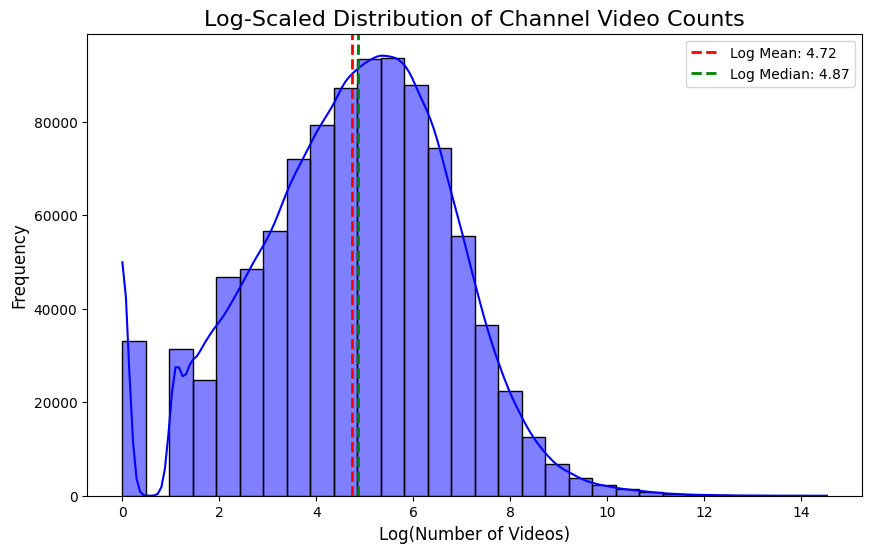

In [21]:
active_channels_df['log_video_count'] = active_channels_df['channel_video_count'].apply(lambda x: np.log1p(x))
plt.figure(figsize=(10,6))
sns.histplot(active_channels_df['log_video_count'], bins=30, kde=True, color='blue')
log_mean = active_channels_df['log_video_count'].mean()
log_median = active_channels_df['log_video_count'].median()
plt.axvline(log_mean, color='red', linestyle='--', linewidth=2, label=f'Log Mean: {log_mean:.2f}')
plt.axvline(log_median, color='green', linestyle='--', linewidth=2, label=f'Log Median: {log_median:.2f}')
plt.title('Log-Scaled Distribution of Channel Video Counts', fontsize=16)
plt.xlabel('Log(Number of Videos)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


### View Count Stats

In [ ]:
view_count_stats = active_channels_df['channel_view_count'].describe()
print(view_count_stats)

/var/folders/mx/qyzv6w1s6vvfbglqfp09p6240000gq/T/ipykernel_84448/1112553188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_channels_df['log_view_count'] = active_channels_df['channel_view_count'].apply(lambda x: np.log1p(x))


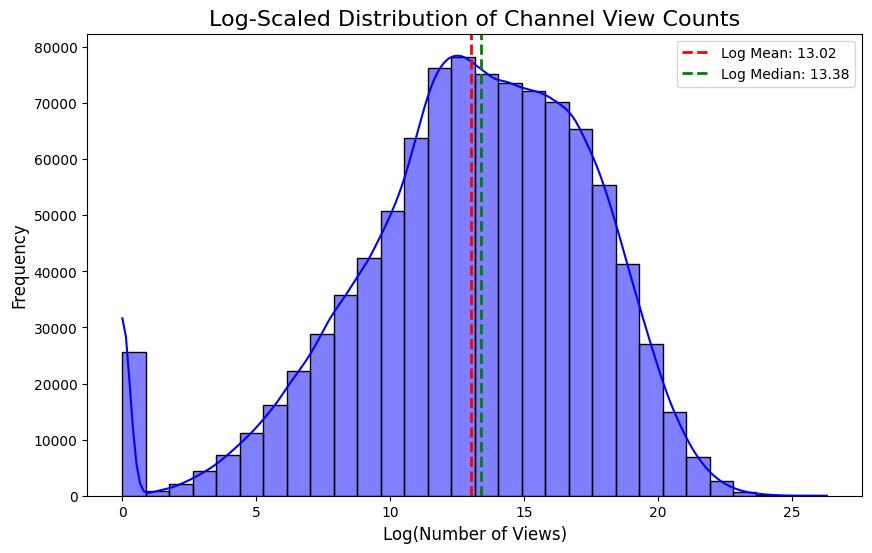

In [23]:
# Log-transform the channel_view_count
active_channels_df['log_view_count'] = active_channels_df['channel_view_count'].apply(lambda x: np.log1p(x))

# Plotting the log-transformed distribution for channel_view_count
plt.figure(figsize=(10,6))
sns.histplot(active_channels_df['log_view_count'], bins=30, kde=True, color='blue')

# Calculating mean and median for log-transformed channel_view_count
log_mean_view_count = active_channels_df['log_view_count'].mean()
log_median_view_count = active_channels_df['log_view_count'].median()

# Adding lines for mean and median
plt.axvline(log_mean_view_count, color='red', linestyle='--', linewidth=2, label=f'Log Mean: {log_mean_view_count:.2f}')
plt.axvline(log_median_view_count, color='green', linestyle='--', linewidth=2, label=f'Log Median: {log_median_view_count:.2f}')

# Labels, title, and legend
plt.title('Log-Scaled Distribution of Channel View Counts', fontsize=16)
plt.xlabel('Log(Number of Views)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show the plot
plt.show()


### Subscriber Count Stats

In [24]:
subscriber_count_stats = active_channels_df['converted_subscriber_count'].describe()
print(subscriber_count_stats)

count    9.406420e+05
mean     2.047050e+05
std      1.320331e+06
min      2.000000e+00
25%      2.440000e+02
50%      3.060000e+03
75%      4.830000e+04
max      3.090000e+08
Name: converted_subscriber_count, dtype: float64


/var/folders/mx/qyzv6w1s6vvfbglqfp09p6240000gq/T/ipykernel_84448/3301684035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_channels_df['log_subscriber_count'] = active_channels_df['converted_subscriber_count'].apply(lambda x: np.log1p(x))


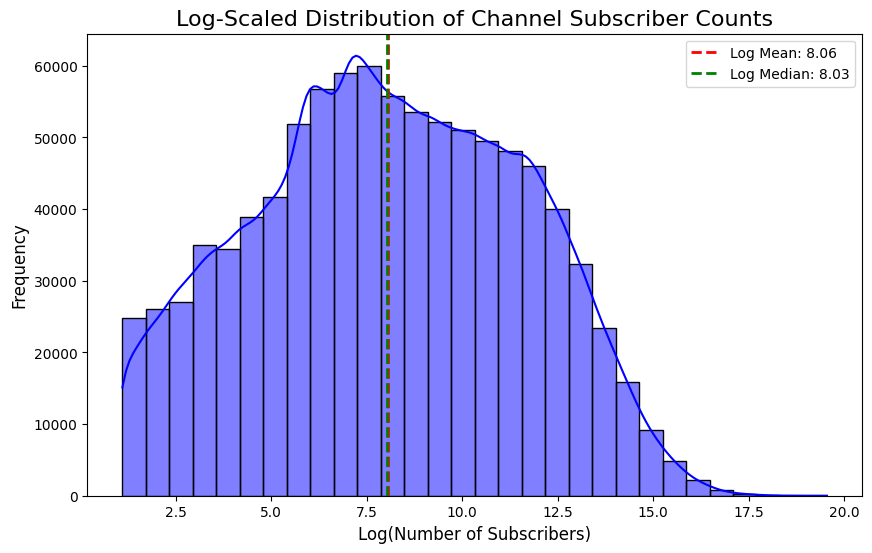

In [25]:
# Log-transform the converted_subscriber_count
active_channels_df['log_subscriber_count'] = active_channels_df['converted_subscriber_count'].apply(lambda x: np.log1p(x))

# Plotting the log-transformed distribution for converted_subscriber_count
plt.figure(figsize=(10,6))
sns.histplot(active_channels_df['log_subscriber_count'], bins=30, kde=True, color='blue')

# Calculating mean and median for log-transformed converted_subscriber_count
log_mean_subscriber_count = active_channels_df['log_subscriber_count'].mean()
log_median_subscriber_count = active_channels_df['log_subscriber_count'].median()

# Adding lines for mean and median
plt.axvline(log_mean_subscriber_count, color='red', linestyle='--', linewidth=2, label=f'Log Mean: {log_mean_subscriber_count:.2f}')
plt.axvline(log_median_subscriber_count, color='green', linestyle='--', linewidth=2, label=f'Log Median: {log_median_subscriber_count:.2f}')

# Labels, title, and legend
plt.title('Log-Scaled Distribution of Channel Subscriber Counts', fontsize=16)
plt.xlabel('Log(Number of Subscribers)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show the plot
plt.show()
